# Student Exam Score Prediction using Linear Regression Based on Hours Studied

In [ ]:
import pandas as pd

df = pd.read_csv("/content/StudentPerformanceFactors.csv", usecols=["Hours_Studied", "Exam_Score"])

print("First 5 records:")
print(df.head())

if df.isnull().any().any():
    print("\nMissing values found:")
    print(df.isnull().sum())
else:
    print("\nNo missing values in the selected columns.")

print("\nSummary statistics:")
print(df.describe())


First 5 records:
   Hours_Studied  Exam_Score
0             23          67
1             19          61
2             24          74
3             29          71
4             19          70

No missing values in the selected columns.

Summary statistics:
       Hours_Studied   Exam_Score
count    6607.000000  6607.000000
mean       19.975329    67.235659
std         5.990594     3.890456
min         1.000000    55.000000
25%        16.000000    65.000000
50%        20.000000    67.000000
75%        24.000000    69.000000
max        44.000000   101.000000


In [ ]:
print("Data types:\n", df.dtypes)
print("\nCorrelation between Hours and Scores:")
print(df.corr())
print("\nDataset shape:", df.shape)

Data types:
 Hours_Studied    int64
Exam_Score       int64
dtype: object

Correlation between Hours and Scores:
               Hours_Studied  Exam_Score
Hours_Studied       1.000000    0.445455
Exam_Score          0.445455    1.000000

Dataset shape: (6607, 2)


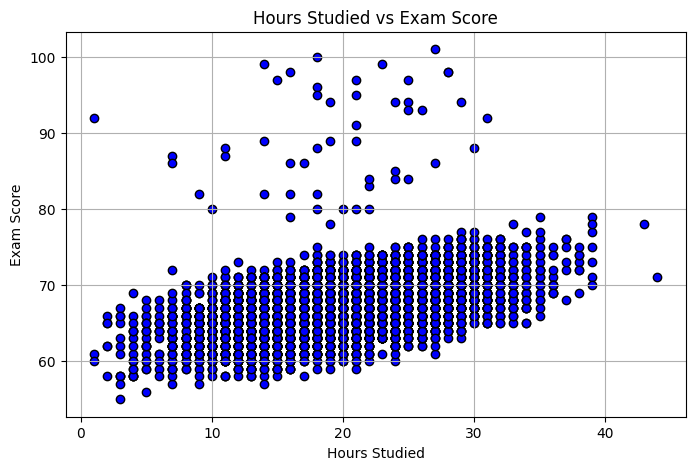

In [ ]:
import matplotlib.pyplot as plt

# Scatter plot
plt.figure(figsize=(8, 5))
plt.scatter(df["Hours_Studied"], df["Exam_Score"], color='blue', edgecolors='k')
plt.title("Hours Studied vs Exam Score")
plt.xlabel("Hours Studied")
plt.ylabel("Exam Score")
plt.grid(True)
plt.show()


In [ ]:
from sklearn.model_selection import train_test_split

X = df[["Hours_Studied"]]  # Independent Variable
y = df["Exam_Score"]       # Target Variable

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [ ]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(X_train, y_train)


LinearRegression()

In [ ]:
y_pred = model.predict(X_test)

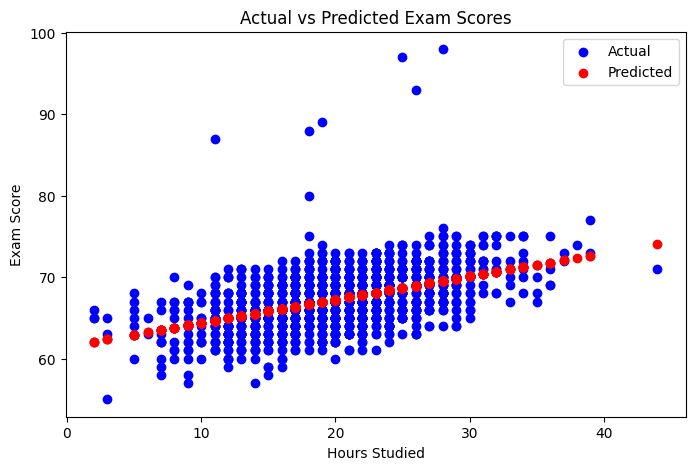

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8,5))
plt.scatter(X_test, y_test, color='blue', label='Actual')
plt.scatter(X_test, y_pred, color='red', label='Predicted')
plt.title("Actual vs Predicted Exam Scores")
plt.xlabel("Hours Studied")
plt.ylabel("Exam Score")
plt.legend()
plt.show()

In [ ]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"MAE: {mae:.2f}")
print(f"MSE: {mse:.2f}")
print(f"R² Score: {r2:.2f}")


MAE: 2.45
MSE: 10.86
R² Score: 0.23


**# Polynomial Regression Model (Degree = 4)**

In [ ]:
from sklearn.preprocessing import PolynomialFeatures
poly = PolynomialFeatures(degree=4)
X_poly = poly.fit_transform(X_train)

In [ ]:
poly_model = LinearRegression()
poly_model.fit(X_poly, y_train)

LinearRegression()

In [ ]:
X_test_poly = poly.transform(X_test)
y_poly_pred = poly_model.predict(X_test_poly)

In [ ]:

# Linear Regression Predictions (already trained)
y_linear_pred = model.predict(X_test)

# R² Scores
r2_linear = r2_score(y_test, y_linear_pred)
r2_poly = r2_score(y_test, y_poly_pred)

print(f"Linear Regression R²: {r2_linear:.2f}")
print(f"Polynomial Regression R²: {r2_poly:.2f}")

# Errors (optional)
print(f"Linear MAE: {mean_absolute_error(y_test, y_linear_pred):.2f}")
print(f"Polynomial MAE: {mean_absolute_error(y_test, y_poly_pred):.2f}")

Linear Regression R²: 0.23
Polynomial Regression R²: 0.23
Linear MAE: 2.45
Polynomial MAE: 2.45


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but PolynomialFeatures was fitted with feature names
  warnings.warn(


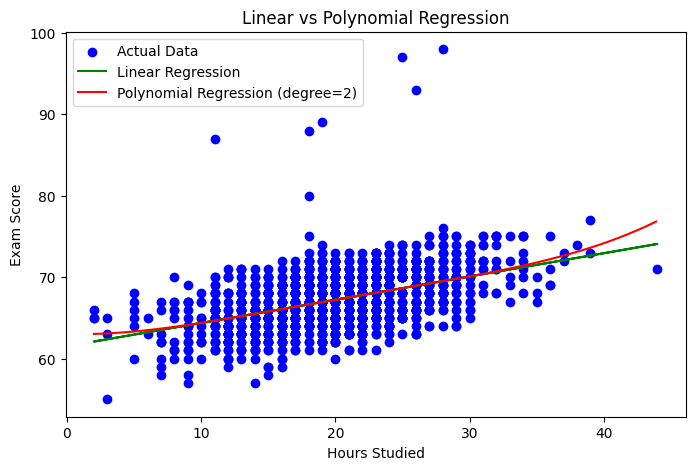

In [ ]:
import numpy as np
plt.figure(figsize=(8,5))

# Scatter actual test points
plt.scatter(X_test, y_test, color='blue', label='Actual Data')

# Plot Linear Regression line
plt.plot(X_test, y_linear_pred, color='green', label='Linear Regression')

# Plot Polynomial Regression curve
# Sort values for a smooth curve
X_grid = np.arange(min(X_test["Hours_Studied"]), max(X_test["Hours_Studied"]), 0.1).reshape(-1,1)
X_grid_poly = poly.transform(X_grid)
plt.plot(X_grid, poly_model.predict(X_grid_poly), color='red', label='Polynomial Regression (degree=2)')

plt.title("Linear vs Polynomial Regression")
plt.xlabel("Hours Studied")
plt.ylabel("Exam Score")
plt.legend()
plt.show()


**Conclusion**
Both Linear and Polynomial Regression models produced almost similar results, with an R² score of 0.23 and MAE of 2.45. Since Polynomial Regression did not improve performance, Linear Regression is preferred for its simplicity and comparable accuracy.